# Hierarchial (Agglomerative Clustering) using Scipy and Sklearn

The aim of this project is to use the iris dataset in performing agglomerative(hierarchial) clustering using two libraries: scipy and sklearn

### 1. Using Scipy

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [3]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])

#### Standardize Features:

Standardization ensures all features have equal weight in the clustering process.

In [4]:
# Perform hierarchical clustering

linkage_matrix = linkage(data_scaled, method='ward')  # Ward's method minimizes variance within clusters

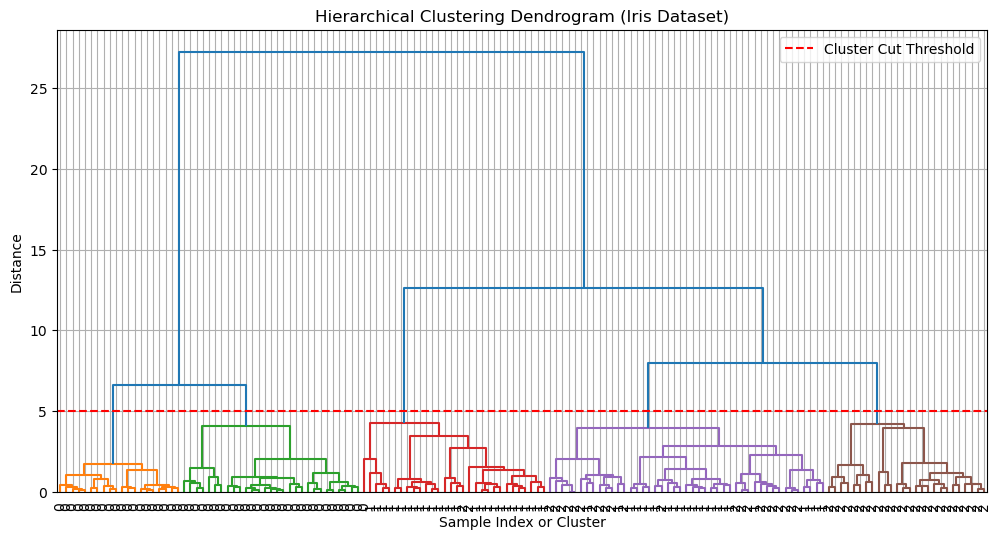

In [6]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=iris.target, leaf_rotation=90, leaf_font_size=10, color_threshold=5)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample Index or Cluster')
plt.ylabel('Distance')
plt.grid(True)
plt.axhline(y=5, color='r', linestyle='--', label='Cluster Cut Threshold')
plt.legend()
plt.show()

In [7]:
# Form flat clusters (e.g., specifying 3 clusters)

clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

#### Flat Clustering:

The fcluster function extracts clusters by cutting the dendrogram at a specified distance or number of clusters.

In [8]:
# Add cluster labels to the dataset

data['cluster'] = clusters

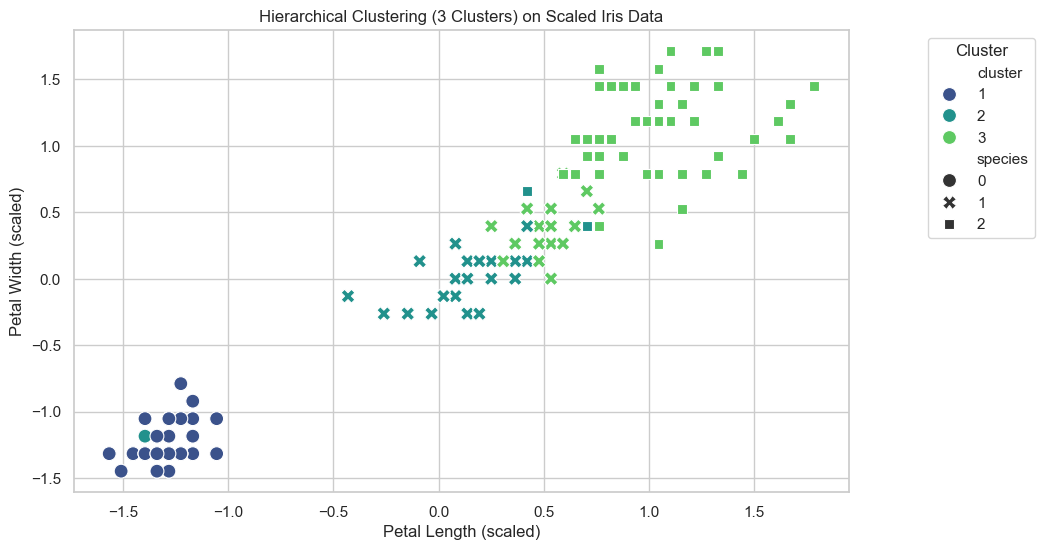

In [9]:
# Visualize the clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_scaled[:, 2],  # Petal length
    y=data_scaled[:, 3],  # Petal width
    hue=data['cluster'].astype(str),
    palette="viridis",
    style=data['species'].astype(str),
    s=100
)
plt.title('Hierarchical Clustering (3 Clusters) on Scaled Iris Data')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend(title="Cluster", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [10]:
# Evaluate cluster distribution

cluster_distribution = data.groupby('cluster')['species'].value_counts()
print("Cluster Distribution:\n", cluster_distribution)

Cluster Distribution:
 cluster  species
1        0          49
2        1          27
         2           2
         0           1
3        2          48
         1          23
Name: count, dtype: int64


In [11]:
# Save results to a CSV file

data.to_csv('hierarchical_clustering_iris.csv', index=False)
print("Results saved to 'hierarchical_clustering_iris.csv'.")

Results saved to 'hierarchical_clustering_iris.csv'.


### 2. Using SKlearn

In [13]:
# Importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
# Load the Iris dataset

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [15]:
# Standardize the features

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])

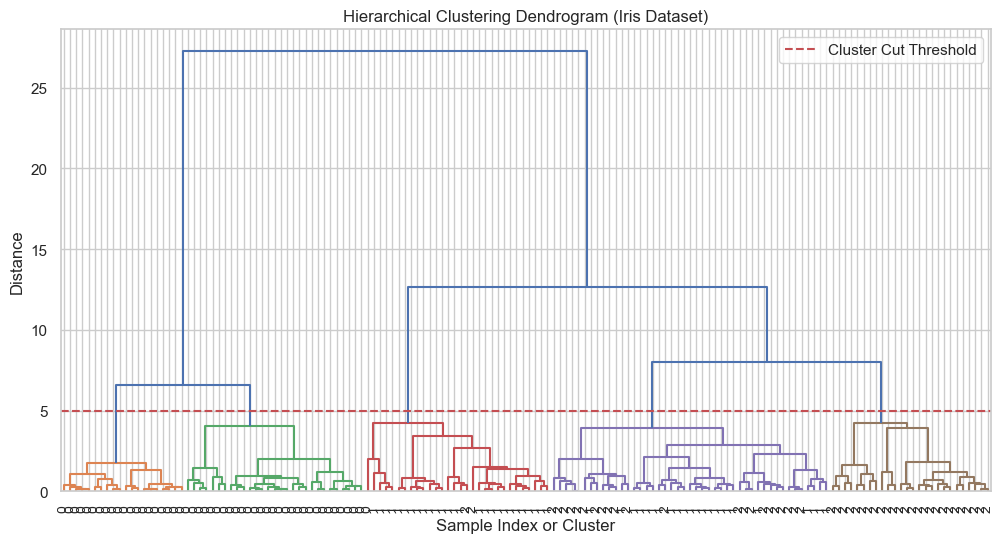

In [17]:
# Visualize the Dendrogram

linkage_matrix = linkage(data_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=iris.target, leaf_rotation=90, leaf_font_size=10, color_threshold=5)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample Index or Cluster')
plt.ylabel('Distance')
plt.axhline(y=5, color='r', linestyle='--', label='Cluster Cut Threshold')
plt.legend()
plt.show()

In [20]:
# Perform Agglomerative Clustering

agglomerative_clustering = AgglomerativeClustering(
    n_clusters=3,  # Set the number of clusters
    metric='euclidean',  # Distance metric (replaces 'affinity')
    linkage='ward'  # Method for merging clusters
)
data['cluster'] = agglomerative_clustering.fit_predict(data_scaled)

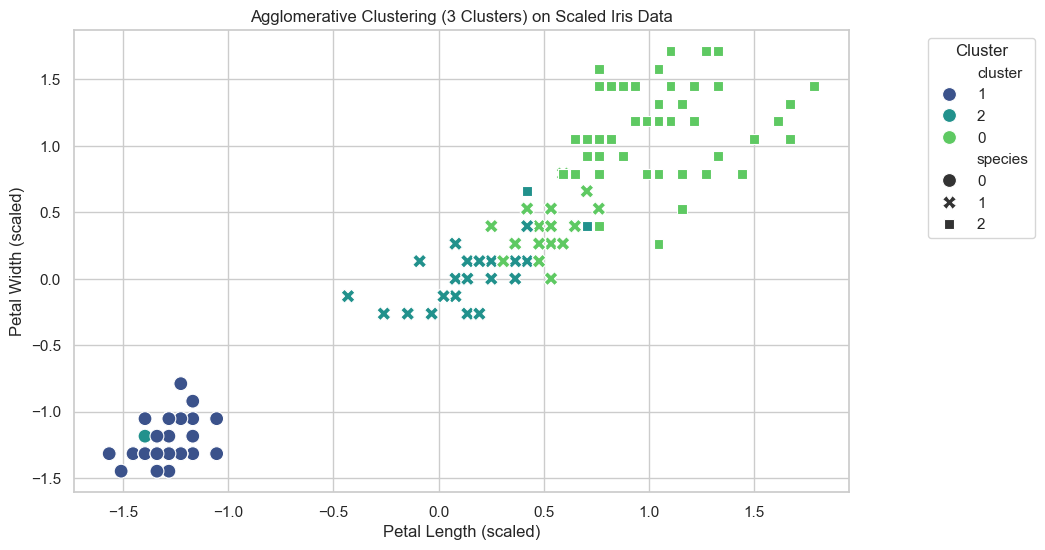

In [21]:
# Visualize Clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_scaled[:, 2],  # Petal length
    y=data_scaled[:, 3],  # Petal width
    hue=data['cluster'].astype(str),
    palette="viridis",
    style=data['species'].astype(str),
    s=100
)
plt.title('Agglomerative Clustering (3 Clusters) on Scaled Iris Data')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend(title="Cluster", loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [23]:
# Evaluate cluster distribution

cluster_distribution = data.groupby('cluster')['species'].value_counts()
print("Cluster Distribution:\n", cluster_distribution)

Cluster Distribution:
 cluster  species
0        2          48
         1          23
1        0          49
2        1          27
         2           2
         0           1
Name: count, dtype: int64


In [24]:
# Save results to a CSV file

data.to_csv('sklearn_hierarchical_clustering_iris.csv', index=False)
print("Results saved to 'sklearn_hierarchical_clustering_iris.csv'.")

Results saved to 'sklearn_hierarchical_clustering_iris.csv'.
